# Finding wavelength and diameter of slit

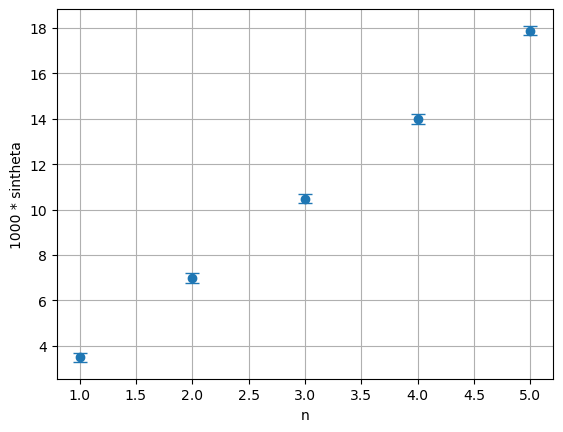

In [1]:
import numpy as np
from LeastSquare import LeastSquareRegression
y = np.array([1.75, 3.50, 5.25, 7.00, 8.95], dtype=np.float64)
n = np.array([1, 2, 3, 4, 5], dtype=np.float64)
error_y = 0.1
D = 500.6 #in cm
error_D = 0.2 #in cm
sintheta = np.sin(np.arctan(y/D))
Y = sintheta * 1000
X = n
errorY = 1000 * ((2 * y * y + D * D) * error_y + y * D * error_D) / ((y * y + D * D) ** 1.5)
from matplotlib import pyplot as plt
plt.errorbar(X, Y, yerr=errorY, fmt='o', capsize=5)
plt.xlabel('n')
plt.ylabel('1000 * sintheta')
plt.grid(True)
plt.show()

In [2]:

def f(x):
    return x
def dfdx(x):
    return 1
def g(y):
    return np.sin(np.arctan(y/D))
def dgdy(y):
    return (2 * y * y + D * D) / ((y * y + D * D) ** 1.5)
model = LeastSquareRegression()
results = model.fit(n, y, f, g, dfdx, dgdy, 0, 0.1)
print(results)

{'a': 0.003575015619381327, 'b': -0.0001587285290972361, 'sigma_a': 6.317471091081266e-05, 'sigma_b': 0.00020951773732052223}


In [3]:
(results['a'] * 8 + 650 * results['sigma_a'])/ (results['a']**2)

5450.678532679712

# Determining diameter of wire

In [6]:
D = 210.2
def f(x):
    return x
def dfdx(x):
    return 1
def g(y):
    return np.sin(np.arctan(y/D))
def dgdy(y):
    return (2 * y * y + D * D) / ((y * y + D * D) ** 1.5)
y = np.array([1.60, 3.2, 4.8, 6.45, 8.10, 9.70], dtype=np.float64)
n = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
lm = 650 * 1e-6 #in mm
sigma_lm = 8 * 1e-6
model2 = LeastSquareRegression()
results2 = model2.fit(n, y, f, g, dfdx, dgdy, 0, 0.1)
a = lm / results2['a']
sigma_a = (results2['a'] * sigma_lm + lm * results2['sigma_a']) / (results2['a'] ** 2)
print(a, sigma_a)

0.08422080301737381 0.0022782010045046368


In [7]:
print(results2['b'])

-0.0001894840939032819


In [8]:
m = np.array([1.22, 2.23, 3.23, 4.24], dtype=np.float64)
y = np.array([0.5, 0.9, 1.40, 1.75], dtype=np.float64)
D = 264
model3 = LeastSquareRegression()
results3 = model3.fit(m, y, f, g, dfdx, dgdy, 0, 0.1)
d = lm / results3['a']
sigma_d = (results3['a'] * sigma_lm + lm * results3['sigma_a']) / (results3['a'] ** 2)
print(d, sigma_d)
print(results3['b'])

0.4062484032466449 0.04775501725050944
-5.9365921222785147e-05
